In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import MCMT
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
n=3
q=0

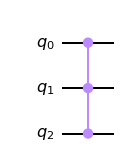

In [3]:
cnz = MCMT('z', n-1, 1)
cnz.draw(output='mpl')


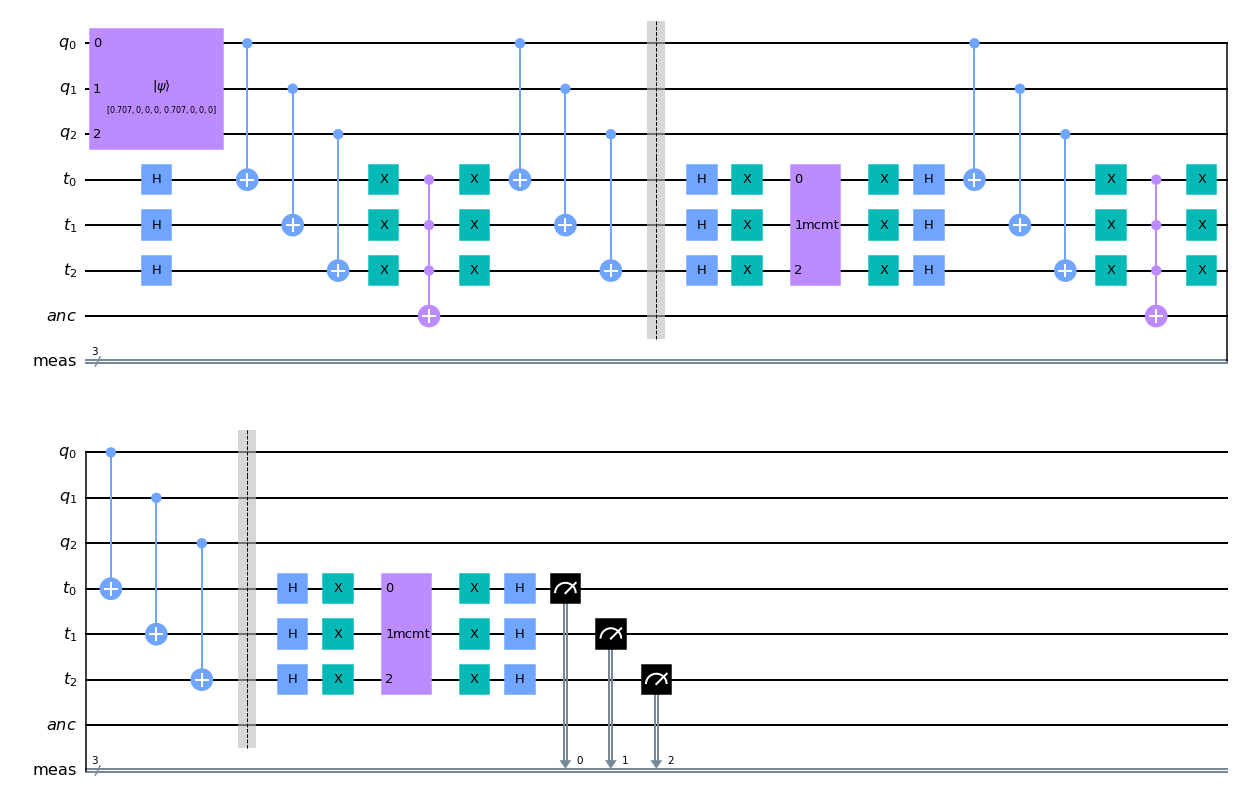

In [24]:
Qubits = QuantumRegister(n,'q')
Measure = ClassicalRegister(n,'meas')
Template = QuantumRegister(n, 't')
Anscilla = QuantumRegister(1,'anc')
qc = QuantumCircuit(Qubits,Template, Anscilla,Measure)

qc.initialize([np.sqrt(32)/np.sqrt(64),0,0,0, np.sqrt(32)/np.sqrt(64),0,0,0],Qubits)
# qc.initialize([1/np.sqrt(2**n) for i in range(2**n)],Template)

qc.h(Template)

for i in range(2):
    for i in range(q,n):
        qc.cnot(i,i+n)

    for i in range(q+n,2*n):
        qc.x(i)

    qc.mcx([i for i in range(n+q,2*n)],2*n,mode='noancilla')



    for i in range(q+n,2*n):
        qc.x(i)

    for i in range(q,n):
        qc.cnot(i,i+n)
    qc.barrier()


    qc.h(Template)
    qc.x(Template)
    qc.append(cnz,Template)
    qc.x(Template)
    qc.h(Template)


qc.measure(Template,Measure)
qc.draw(output='mpl')


Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-11513 contains invalid instructions {"gates": {mcmt}} for "statevector" method.


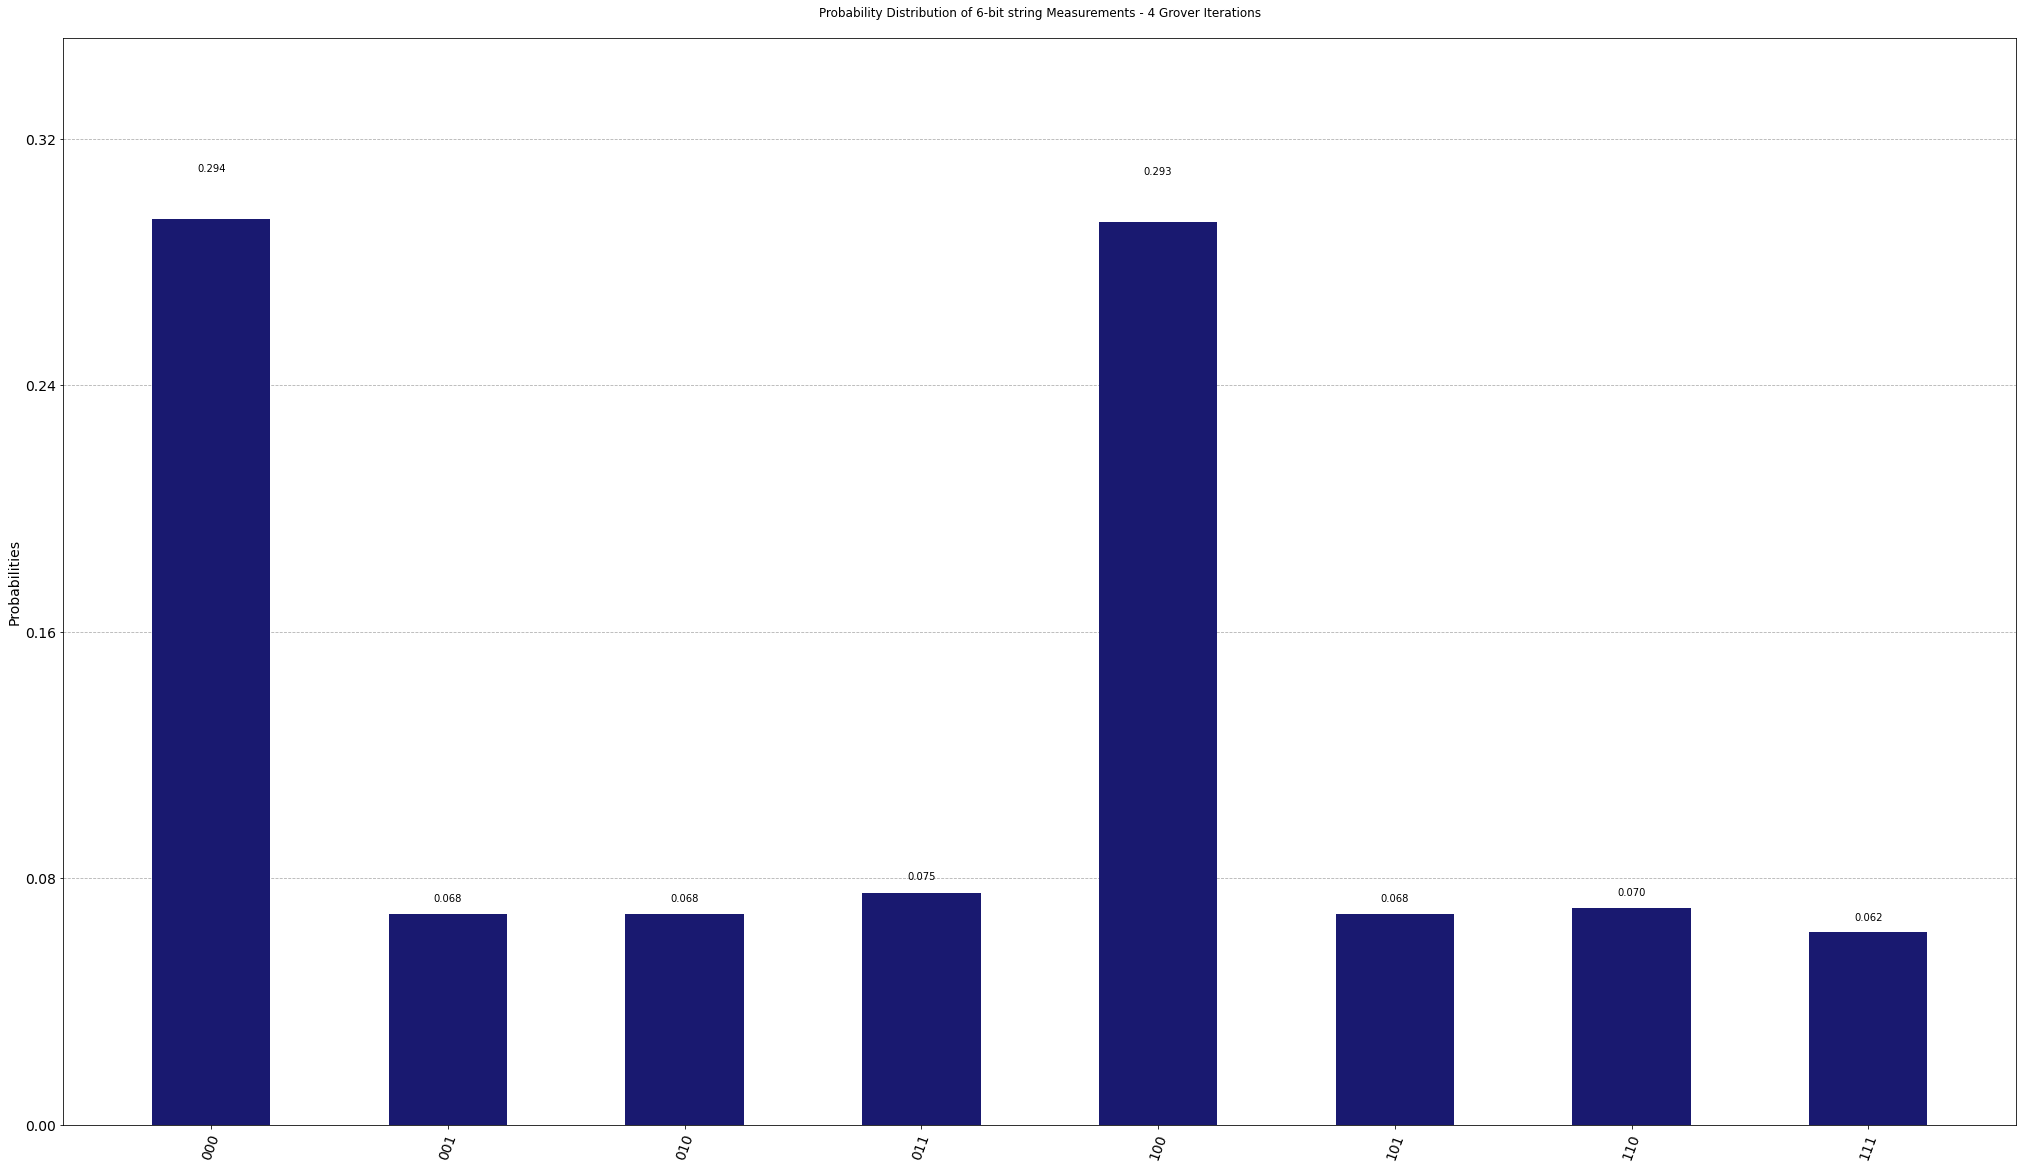

In [25]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = job.result().get_counts(qc)
plot_histogram(counts, title='Probability Distribution of 6-bit string Measurements - 4 Grover Iterations\n', color='midnightblue',figsize=(35,20))